<a href="https://colab.research.google.com/github/pt-yash-pandey/creative-ads/blob/main/Creative_vs_non_creative_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ads.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data set/TRAIN',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data set/TEST',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 88 files belonging to 2 classes.
Found 88 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_10 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
y_pred

[0, 1, 0, 0, 1]

In [ ]:
y_true

[0, 1, 1, 0, 1]

In [ ]:
history = model.fit(train_ds,epochs=300,validation_data=validation_ds)


Epoch 1/300
3/3 [==============================] - 3s 342ms/step - loss: 4.8645 - accuracy: 0.6250 - val_loss: 0.7061 - val_accuracy: 0.5227
Epoch 2/300
3/3 [==============================] - 1s 250ms/step - loss: 4.1687 - accuracy: 0.7841 - val_loss: 1.0587 - val_accuracy: 0.5682
Epoch 3/300
3/3 [==============================] - 1s 236ms/step - loss: 7.7822 - accuracy: 0.8295 - val_loss: 1.4833 - val_accuracy: 0.5909
Epoch 4/300
3/3 [==============================] - 1s 238ms/step - loss: 2.0143 - accuracy: 0.9091 - val_loss: 1.2845 - val_accuracy: 0.6932
Epoch 5/300
3/3 [==============================] - 1s 263ms/step - loss: 0.1315 - accuracy: 0.9886 - val_loss: 1.7505 - val_accuracy: 0.6818
Epoch 6/300
3/3 [==============================] - 1s 222ms/step - loss: 0.5436 - accuracy: 0.9432 - val_loss: 2.3697 - val_accuracy: 0.6818
Epoch 7/300
3/3 [==============================] - 1s 175ms/step - loss: 0.6701 - accuracy: 0.9773 - val_loss: 3.1344 - val_accuracy: 0.6591
Epoch 8/300
3

In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_true, y_true)*100

print("Accuracy:", accuracy)

Accuracy: 100.0


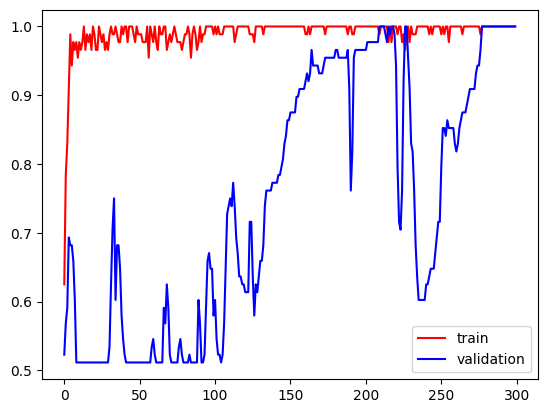

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

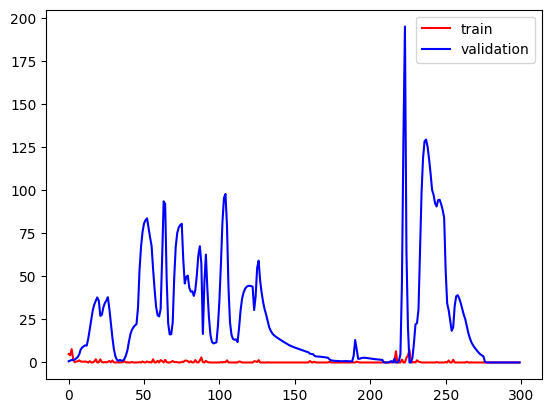

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/download (1).jpeg')

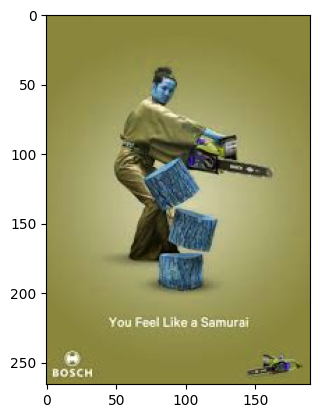

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(266, 190, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 120ms/step


array([[1.]], dtype=float32)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Generate a hypothetical dataset (replace this with your actual data)
X = np.random.randn(88, 2)  # 1000 samples, 5 features
y = np.random.randint(2, size=88)  # Binary labels (0 or 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Choose a threshold (adjust this based on your preference)
threshold = 0.5

# Convert probabilities to binary predictions using the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cross-validation to evaluate the model's performance
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))


Confusion Matrix:
[[5 5]
 [5 3]]
Precision: 0.375
Recall: 0.375
F1 Score: 0.375
Cross-Validation F1 Scores: [0.70588235 0.14285714 0.625      0.15384615 0.375     ]
Mean CV F1 Score: 0.40051712992889466


In [ ]:
#array([[1.]], dtype=float32) = ads creative
#array([[0.]], dtype=float32) = ads not creative